# Physical Activity, and Obesity Data Analysis

## Introduction

The following is an analysis of the impact and efficiency of various types and intensity of physical activities on people's obesity level.
I wanted gather data and find out whether aerobic activities or muscle training (or weight training) activities are more effective to prevent or combat overweight.
Certainly, diet is also a very important factor to combat overweight, but this analysis will focus on the exercising aspect.

## Hypothesis

During my analysis I'll peform hypothesis test to reject or fail to reject the Null Hypothesis that various kinds, intensity, length and frequency of aerobic and weight training activities have no effect on obesity.

My preliminary assumption is that both aerobic and weight training activities are effective approaches to combat obesity and when it comes to comparing the effect of the two activity categories, my initial assumption is that aerobic activity is more effective against obesity than weight training activity.

## Data Source

For this analysis I have used the "Nutrition, Physical Activity, and Obesity - Behavioral Risk Factor Surveillance System" (csv) dataset published by the U.S. Department of Health & Human Services (by downloading it in csv format from this website):
https://healthdata.gov/dataset/Nutrition-Physical-Activity-and-Obesity-Behavioral/fhdq-98vk/about_data

The following link also includes the key metadata (data dictionary) of this dataset:
https://chronicdata.cdc.gov/Nutrition-Physical-Activity-and-Obesity/Nutrition-Physical-Activity-and-Obesity-Behavioral/hn4x-zwk7/about_data



Here is the key metadata of the 33 columns in the dataset:



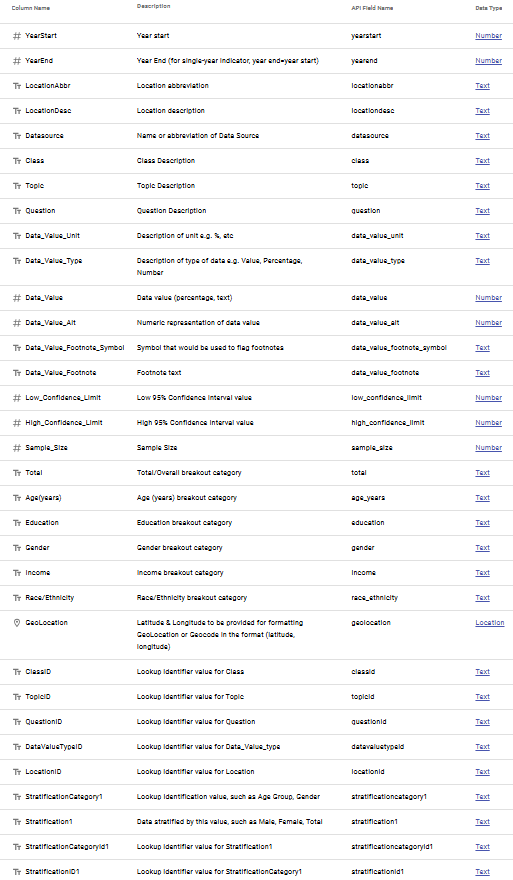

The dataset consisted of 104,272 rows of data and 33 columns.

For Exploratory Data Analysis including preliminary summary statistics exploration of data completeness, I've applied the following steps:

In [46]:
#Import necessary packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [47]:
# Set variable 'nutrition' to a Pandas DataFrame by reading the csv file and show the first 5 rows of the dataset
nutrition = pd.read_csv("Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv")
nutrition.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
1,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,Other,RACE,RACEOTH
2,2011,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,2011.0,Value,...,"(64.845079957001, -147.722059036)",PA,PA1,Q044,VALUE,2,Gender,Female,GEN,FEMALE
3,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Age (years),35 - 44,AGEYR,AGEYR3544
4,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q037,VALUE,2,Income,"$15,000 - $24,999",INC,INC1525


In [48]:
nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104272 entries, 0 to 104271
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   104272 non-null  int64  
 1   YearEnd                     104272 non-null  int64  
 2   LocationAbbr                104272 non-null  object 
 3   LocationDesc                104272 non-null  object 
 4   Datasource                  104272 non-null  object 
 5   Class                       104272 non-null  object 
 6   Topic                       104272 non-null  object 
 7   Question                    104272 non-null  object 
 8   Data_Value_Unit             88872 non-null   float64
 9   Data_Value_Type             104272 non-null  object 
 10  Data_Value                  93505 non-null   float64
 11  Data_Value_Alt              93505 non-null   float64
 12  Data_Value_Footnote_Symbol  10767 non-null   object 
 13  Data_Value_Foo

As it was not clear for certain columns, what their data type should be (and if their data type is correct), I've investigated the data included in those columns (to decide if I need to typecast some of them):

In [49]:
nutrition['Age(years)'].unique()

array([nan, '35 - 44', '25 - 34', '18 - 24', '55 - 64', '65 or older',
       '45 - 54'], dtype=object)

In [50]:
nutrition['Total'].unique()

array([nan, 'Total'], dtype=object)

In [51]:
nutrition['Income'].unique()

array([nan, '$15,000 - $24,999', '$50,000 - $74,999',
       '$75,000 or greater', 'Less than $15,000', '$25,000 - $34,999',
       'Data not reported', '$35,000 - $49,999'], dtype=object)

Based on this I've decided about the following data profiling and cleaning steps and following analytical approaches and techniques:
1. Only keep the 'YearStart' (equal to 'YearEnd'), LocationDesc (state name), Question, Data_Value, Total, Age(years), Gender, Income, Race/Ethnicity column an drop the other columns (unnecessary for my analysis).

2. Rename some of the columns ('YearStart' to 'Year', 'LocationDesc' to 'State', 'Data_Value' to 'Value', 'Race/Ethnicity' to 'Race) to make it easier to read and more user friendly.

3. Change data type from 'object' to string for the Question, Total, Age(years), Education, Gender, Income, and Race columns.

4. Convert the dataframe by pivoting the 'Question' column, i.e. including its members (the various survey questions) in different columns, the values represented from the 'Value' column and using the 'Year', 'State', 'Total', 'Age(years)', 'Education', 'Gender', 'Income', and 'Race' columns as multiindexes. This way we'll be able to easier analyze the values for each question as seprate measures.

5. Examine the resulting dataframe for total number of rows and number of non-null rows for each column/question:
> * For columns/questions where the number of non-null cells is less than approx. 10% of the total number of rows, do nothing. NaN cells will not be considered in aggregated calculatioins. And it's normal that for some states, in some years survey data is not available due to inadequate sample size.
> * For columns where the number of non-null cells is significantly more than 10% of the total number of rows, further analyze the number of not-null rows by Year or by State (to better understand if those survey questions were systematically not asked in certain years or states).
> * Depending on the outcome of this analysis, decide whether and how to treat NaN values in case of those columns/questions where we have many NaN values (exclude certain states from the analysis, populate those cells with the average of the existing values, etc).

6. Narrow the dataset down to the aggregated survey values by question/state/year (i.e. the aggregated results across all the age groups, races, genders, etc). This is by selecting those rows where the Total index was not NaN. This will provide a dataframe with the overall survey results aggregated for each question (in the columns), each year/state combination representing a separate row.

7. Calculate the average of the various states' values across each year: nutrition_total = nutrition_total.groupby('State')[columns_to_average].mean(). This will give an average value of the various percentage values (survey results, e.g. % of respondents with obesity, % with min 150min moderate or 75min vigorous aerobic activity per week, etc in the various columns) by state (average of the response values across all the survey years). Plot this resulting dataframe (using scatterplot) with % of respondents with obesity (i.e. average proportion of respondents with obesity across all the years) as outcome variable on the Y axis and the other measures (e.g. % of respondents with min 150min moderate or 75min vigorous aerobic activity per week) as explanatory variables on the X axis.

8. Looking at the various scatterplots (and also by running the corr function in Python) analyze which explanatory variable has the strongest correlation with the % of respondents with obesity variable. Also look for outliers based on the scatterplot.

9. Also calculate the p value for each explanatory variable to ascertain in case of which type of activity can we reject the null hypothesis (if any) that those kind of activities have no effect on obesity.

10. Also plot the variables on a heatmap, based on this aggregated dataset, showing the states in the various rows (y axis) and the measures (e.g. % with obesity, % with min 150min moderate or 75min vigorous aerobic activity per week, etc) in the columns (x axis). As this visual has many measure/state combinations, heatmap is an efficient way of easily visualize highest and lowest values (e.g. states with the highest % of obesity, lowest % of people doing weight training exercise at least 2 days a week, etc).

#### Only keep the 'YearStart' (equal to 'YearEnd'), LocationDesc (state name), Question, Data_Value, Total, Age(years), Gender, Income, Race/Ethnicity column an drop the other columns (unnecessary for my analysis).

In [52]:
# Drop unwanted columns
nutrition = nutrition.drop(columns=[
    'YearEnd',
    'LocationAbbr',
    'Datasource',
    'Class',
    'Topic',
    'Data_Value_Unit',
    'Data_Value_Type',
    'Data_Value_Alt',
    'Data_Value_Footnote_Symbol',
    'Data_Value_Footnote',
    'Low_Confidence_Limit',
    'High_Confidence_Limit ',
    'Sample_Size',
    'GeoLocation',
    'ClassID',
    'TopicID',
    'QuestionID',
    'DataValueTypeID',
    'LocationID',
    'StratificationCategory1',
    'Stratification1',
    'StratificationCategoryId1',
    'StratificationID1',
])

nutrition.head()

,YearStart,LocationDesc,Question,Data_Value,Total,Age(years),Education,Gender,Income,Race/Ethnicity
0,2011,Alaska,Percent of adults aged 18 years and older who ...,23.3,NaN,NaN,NaN,NaN,NaN,2 or more races
1,2011,Alaska,Percent of adults aged 18 years and older who ...,35.5,NaN,NaN,NaN,NaN,NaN,Other
2,2011,Alaska,Percent of adults who achieve at least 150 min...,21.7,NaN,NaN,NaN,Female,NaN,NaN
3,2011,Alaska,Percent of adults aged 18 years and older who ...,29.5,NaN,35 - 44,NaN,NaN,NaN,NaN
4,2011,Alaska,Percent of adults aged 18 years and older who ...,33.5,NaN,NaN,NaN,NaN,"$15,000 - $24,999",NaN


#### Rename some of the columns ('YearStart' to 'Year', 'LocationDesc' to 'State', 'Data_Value' to 'Value', 'Race/Ethnicity' to 'Race) to make it easier to read and more user friendly.

In [53]:
nutrition.rename(columns={'YearStart': 'Year', 'LocationDesc': 'State', 'Data_Value': 'Value', 'Race/Ethnicity': 'Race'}, inplace=True)

In [54]:
nutrition.head()

,Year,State,Question,Value,Total,Age(years),Education,Gender,Income,Race
0,2011,Alaska,Percent of adults aged 18 years and older who ...,23.3,NaN,NaN,NaN,NaN,NaN,2 or more races
1,2011,Alaska,Percent of adults aged 18 years and older who ...,35.5,NaN,NaN,NaN,NaN,NaN,Other
2,2011,Alaska,Percent of adults who achieve at least 150 min...,21.7,NaN,NaN,NaN,Female,NaN,NaN
3,2011,Alaska,Percent of adults aged 18 years and older who ...,29.5,NaN,35 - 44,NaN,NaN,NaN,NaN
4,2011,Alaska,Percent of adults aged 18 years and older who ...,33.5,NaN,NaN,NaN,NaN,"$15,000 - $24,999",NaN


In [55]:
nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104272 entries, 0 to 104271
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        104272 non-null  int64  
 1   State       104272 non-null  object 
 2   Question    104272 non-null  object 
 3   Value       93505 non-null   float64
 4   Total       3724 non-null    object 
 5   Age(years)  22344 non-null   object 
 6   Education   14896 non-null   object 
 7   Gender      7448 non-null    object 
 8   Income      26068 non-null   object 
 9   Race        29792 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 8.0+ MB


#### Change data type from 'object' to string for the Question, Total, Age(years), Education, Gender, Income, and Race columns.

In [56]:
nutrition = nutrition.astype({'Question': 'str', 'Total': 'str', 'Age(years)': 'str', 'Education': 'str', 'Gender': 'str', 'Income': 'str', 'Race': 'str'})

#### Convert the dataframe by pivoting the 'Question' column, i.e. including its members (the various survey questions) in different columns, the values represented from the 'Value' column and using the 'Year', 'State', 'Total', 'Age(years)', 'Education', 'Gender', 'Income', and 'Race' columns as multiindexes. This way we'll be able to easier analyze the values for each question as seprate measures.

In [57]:
# Create pivot table (columns from values)
nutrition = nutrition.pivot(index=["Year", "State", "Total", "Age(years)", "Education", "Gender", "Income", "Race"], columns="Question", values="Value")

In [58]:
nutrition.head()

Question                                                    Percent of adults aged 18 years and older who have an overweight classification  \
Year State   Total Age(years) Education Gender Income Race                                                                                    
2011 Alabama Total nan        nan       nan    nan    nan                                                34.7                                 
             nan   18 - 24    nan       nan    nan    nan                                                27.1                                 
                   25 - 34    nan       nan    nan    nan                                                31.9                                 
                   35 - 44    nan       nan    nan    nan                                                33.3                                 
                   45 - 54    nan       nan    nan    nan                                                35.8                                 

Question                                                    Percent of adults aged 18 years and older who have obesity  \
Year State   Total Age(years) Education Gender Income Race                                                               
2011 Alabama Total nan        nan       nan    nan    nan                                                32.0            
             nan   18 - 24    nan       nan    nan    nan                                                16.3            
                   25 - 34    nan       nan    nan    nan                                                35.2            
                   35 - 44    nan       nan    nan    nan                                                35.5            
                   45 - 54    nan       nan    nan    nan                                                38.0            

Question                                                    Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)  \
Year State   Total Age(years) Education Gender Income Race                                                                                                                                                                                                         
2011 Alabama Total nan        nan       nan    nan    nan                                                42.4                                                                                                                                                      
             nan   18 - 24    nan       nan    nan    nan                                                49.4                                                                                                                                                      
                   25 - 34    nan       nan    nan    nan                                                41.9                                                                                                                                                      
                   35 - 44    nan       nan    nan    nan                                                41.8                                                                                                                                                      
                   45 - 54    nan       nan    nan    nan                                                39.3                                                                                                                                                      

Question                                                    Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week  \
Year State   

In [59]:
# The columns have a very long name, therefore I rename them, shortening their name
nutrition.rename(columns={
    'Percent of adults aged 18 years and older who have an overweight classification': '% with overweight',
    'Percent of adults aged 18 years and older who have obesity': '% with obesity',
    'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)': '% with min 150min moderate or 75min vigorous aerobic activity per week',
    'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week': '% with min 150min moderate or 75min vigorous aerobic activity and 2+ days muscle training per week',
    'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)': '% with min 300min moderate or 150min vigorous aerobic activity per week',
    'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week': '% with 2+ days muscle training per week',
    'Percent of adults who engage in no leisure-time physical activity': '% with no physical activity',
    'Percent of adults who report consuming fruit less than one time daily': '% eating fruits less than once per day',
    'Percent of adults who report consuming vegetables less than one time daily': '% eating vegetables less than once per day'},
                 inplace=True)

In [60]:
nutrition.head()

Question                                                    % with overweight  \
Year State   Total Age(years) Education Gender Income Race                      
2011 Alabama Total nan        nan       nan    nan    nan                34.7   
             nan   18 - 24    nan       nan    nan    nan                27.1   
                   25 - 34    nan       nan    nan    nan                31.9   
                   35 - 44    nan       nan    nan    nan                33.3   
                   45 - 54    nan       nan    nan    nan                35.8   

Question                                                    % with obesity  \
Year State   Total Age(years) Education Gender Income Race                   
2011 Alabama Total nan        nan       nan    nan    nan             32.0   
             nan   18 - 24    nan       nan    nan    nan             16.3   
                   25 - 34    nan       nan    nan    nan             35.2   
                   35 - 44    nan       nan    nan    nan             35.5   
                   45 - 54    nan       nan    nan    nan             38.0   

Question                                                    % with min 150min moderate or 75min vigorous aerobic activity per week  \
Year State   Total Age(years) Education Gender Income Race                                                                           
2011 Alabama Total nan        nan       nan    nan    nan                                                42.4                        
             nan   18 - 24    nan       nan    nan    nan                                                49.4                        
                   25 - 34    nan       nan    nan    nan                                                41.9                        
                   35 - 44    nan       nan    nan    nan                                                41.8                        
                   45 - 54    nan       nan    nan    nan                                                39.3                        

Question                                                    % with min 150min moderate or 75min vigorous aerobic activity and 2+ days muscle training per week  \
Year State   Total Age(years) Education Gender Income Race                                                                                                       
2011 Alabama Total nan        nan       nan    nan    nan                                                15.0                                                    
             nan   18 - 24    nan       nan    nan    nan                                                27.2                                                    
                   25 - 34    nan       nan    nan    nan                                                16.3                                                    
                   35 - 44    nan       nan    nan    nan                                                17.0                                                    
                   45 - 54    nan       nan    nan    nan                                                12.4                                                    

Question                                                    % with min 300min moderate or 150min vigorous aerobic activity per week  \
Year State   Total Age(years) Education Gender Income Race                                                                            
2011 Alabama Total nan        nan       nan    nan    nan                                                23.9                         
             nan   18 - 24    nan       nan    nan    nan                                                25.8                         
                   25 - 34    nan       nan    nan    nan                                                20.9                         
                   35 - 44    nan       nan    nan    nan                                                22.8                         
 

#### Examine the resulting dataframe for total number of rows and number of non-null rows for each column/question:
> * For columns/questions where the number of non-null cells is less than approx. 10% of the total number of rows, do nothing. NaN cells will not be considered in aggregated calculatioins. And it's normal that for some states, in some years survey data is not available due to inadequate sample size.
> * For columns where the number of non-null cells is significantly more than 10% of the total number of rows, further analyze the number of not-null rows by Year or by State (to better understand if those survey questions were systematically not asked in certain years or states).
> * Depending on the outcome of this analysis, decide whether and how to treat NaN values in case of those columns/questions where we have many NaN values (exclude certain states from the analysis, populate those cells with the average of the existing values, etc).

In [61]:
nutrition.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 19684 entries, (2011, 'Alabama', 'Total', 'nan', 'nan', 'nan', 'nan', 'nan') to (2023, 'Wyoming', 'nan', 'nan', 'nan', 'nan', 'nan', 'Other')
Data columns (total 9 columns):
 #   Column                                                                                              Non-Null Count  Dtype  
---  ------                                                                                              --------------  -----  
 0   % with overweight                                                                                   17694 non-null  float64
 1   % with obesity                                                                                      17694 non-null  float64
 2   % with min 150min moderate or 75min vigorous aerobic activity per week                              8052 non-null   float64
 3   % with min 150min moderate or 75min vigorous aerobic activity and 2+ days muscle training per week  8042 non-null   float64
 4

Both the '% with overweight' and '% with obesity' columns have 17,694 non-null rows, which is approximately 90% of the total number of rows in the 'nutrition' dataframe.

This seems close, there were probably some states in some years where the survey has not been made, but it arguably doesn't skew the outcome pf the analysis to any material extent.

Nevertheless, I've analyzed the breakdown of these 17,694 non-null rows in the '% with obesity' column by year and state.

In [62]:
nutrition[nutrition['% with obesity'].notna()].groupby('Year')['% with overweight'].count()

Year
2011    1332
2012    1332
2013    1344
2014    1369
2015    1361
2016    1389
2017    1372
2018    1369
2019    1343
2020    1368
2021    1377
2022    1384
2023    1354
Name: % with overweight, dtype: int64

In [63]:
nutrition[nutrition['% with obesity'].notna()].groupby('State')['% with overweight'].count()

State
Alabama                 323
Alaska                  331
Arizona                 348
Arkansas                326
California              347
Colorado                348
Connecticut             338
Delaware                324
District of Columbia    327
Florida                 319
Georgia                 339
Guam                    250
Hawaii                  338
Idaho                   309
Illinois                323
Indiana                 339
Iowa                    321
Kansas                  342
Kentucky                297
Louisiana               323
Maine                   320
Maryland                349
Massachusetts           337
Michigan                341
Minnesota               343
Mississippi             295
Missouri                330
Montana                 314
National                363
Nebraska                340
Nevada                  334
New Hampshire           312
New Jersey              313
New Mexico              331
New York                342
North Carolina

The number of non-null rows were similar in each year and in each state except the Virgin Islands where the number of results (93) was much smaller than in any other state (usually close to 300 results).

As a result, I removed the data for the Virgin Islands from the analysis:

In [64]:
nutrition = nutrition[nutrition.index.get_level_values('State') != 'Virgin Islands']

The '% with min 150min moderate or 75min vigorous aerobic activity per week', '% with min 150min moderate or 75min vigorous aerobic activity and 2+ days muscle training per week', '% with min 300min moderate or 150min vigorous aerobic activity per week' and '% with 2+ days muscle training per week' columns only have approximately 8,000 not-null rows, i.e. approximately 40% of the total number of rows in the dataframe.

Therefore I've decided to take a look at the breakdown of the non-null rows in these columns by year:

In [65]:
nutrition[~pd.isna(nutrition['% with min 150min moderate or 75min vigorous aerobic activity per week'])].groupby('Year')['% with min 150min moderate or 75min vigorous aerobic activity per week'].count()

Year
2011    1328
2013    1312
2015    1354
2017    1369
2019    1337
2023    1328
Name: % with min 150min moderate or 75min vigorous aerobic activity per week, dtype: int64

In [66]:
nutrition[~pd.isna(nutrition['% with min 150min moderate or 75min vigorous aerobic activity and 2+ days muscle training per week'])].groupby('Year')['% with min 150min moderate or 75min vigorous aerobic activity and 2+ days muscle training per week'].count()

Year
2011    1326
2013    1312
2015    1353
2017    1368
2019    1333
2023    1326
Name: % with min 150min moderate or 75min vigorous aerobic activity and 2+ days muscle training per week, dtype: int64

In [67]:
nutrition[~pd.isna(nutrition['% with min 300min moderate or 150min vigorous aerobic activity per week'])].groupby('Year')['% with min 300min moderate or 150min vigorous aerobic activity per week'].count()

Year
2011    1325
2013    1312
2015    1354
2017    1368
2019    1337
2023    1323
Name: % with min 300min moderate or 150min vigorous aerobic activity per week, dtype: int64

In [68]:
nutrition[~pd.isna(nutrition['% with 2+ days muscle training per week'])].groupby('Year')['% with 2+ days muscle training per week'].count()

Year
2011    1332
2013    1315
2015    1356
2017    1369
2019    1340
2023    1341
Name: % with 2+ days muscle training per week, dtype: int64

Apparently, the number of not-null rows in these columns were very similar to the number of not-null rows in the '% with obesity' column in the years 2011, 2013, 2015, 2017, 2019 and 2023 and these 4 columns were missing data from the other years. Certainly this means that these questions were only surveyed in 2011, 2013, 2015, 2017, 2019 and in 2023. There was no need to handle NaN values for these columns.

## Narrow the dataset down to the aggregated survey values by question/state/year (i.e. the aggregated results across all the age groups, races, genders, etc).

This is done by selecting those rows where the Total index was not NaN. This provides a dataframe with the overall survey results aggregated for each question (in the columns), each year/state combination representing a separate row.

In [69]:
# Make a cross section
nutrition_total = nutrition.xs('Total', level='Total')
nutrition_total

Question                                                    % with overweight  \
Year State         Age(years) Education Gender Income Race                      
2011 Alabama       nan        nan       nan    nan    nan                34.7   
     Alaska        nan        nan       nan    nan    nan                38.9   
     Arizona       nan        nan       nan    nan    nan                37.8   
     Arkansas      nan        nan       nan    nan    nan                33.9   
     California    nan        nan       nan    nan    nan                36.4   
...                                                                       ...   
2023 Virginia      nan        nan       nan    nan    nan                34.3   
     Washington    nan        nan       nan    nan    nan                35.2   
     West Virginia nan        nan       nan    nan    nan                32.0   
     Wisconsin     nan        nan       nan    nan    nan                34.1   
     Wyoming       nan        nan       nan    nan    nan                35.7   

Question                                                    % with obesity  \
Year State         Age(years) Education Gender Income Race                   
2011 Alabama       nan        nan       nan    nan    nan             32.0   
     Alaska        nan        nan       nan    nan    nan             27.4   
     Arizona       nan        nan       nan    nan    nan             25.1   
     Arkansas      nan        nan       nan    nan    nan             30.9   
     California    nan        nan       nan    nan    nan             23.8   
...                                                                    ...   
2023 Virginia      nan        nan       nan    nan    nan             34.3   
     Washington    nan        nan       nan    nan    nan             30.6   
     West Virginia nan        nan       nan    nan    nan             41.2   
     Wisconsin     nan        nan       nan    nan    nan             35.9   
     Wyoming       nan        nan       nan    nan    nan             33.3   

Question                                                    % with min 150min moderate or 75min vigorous aerobic activity per week  \
Year State         Age(years) Education Gender Income Race                                                                           
2011 Alabama       nan        nan       nan    nan    nan                                                42.4                        
     Alaska        nan        nan       nan    nan    nan                                                57.9                        
     Arizona       nan        nan       nan    nan    nan                                                52.8                        
     Arkansas      nan        nan       nan    nan    nan                                                45.7                        
     California    nan        nan       nan    nan    nan                                                58.2                        
...                                                                                                       ...                        
2023 Virginia      nan        nan       nan    nan    nan                                                63.5                        
     Washington    nan        nan       nan    nan    nan                                                66.5                        
     West Virginia nan        nan       nan    nan    nan                                                53.1                        
     Wisconsin     nan        nan       nan    nan    nan                                                58.0                        
     Wyoming       nan        nan       nan    nan    nan                                                60.9                        

Question                                                    % with min 150min moderate or 75min vigorous aerobic activity and 2+ days muscle training per week  \
Year State         Age(yea

In [70]:
nutrition_total.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 697 entries, (2011, 'Alabama', 'nan', 'nan', 'nan', 'nan', 'nan') to (2023, 'Wyoming', 'nan', 'nan', 'nan', 'nan', 'nan')
Data columns (total 9 columns):
 #   Column                                                                                              Non-Null Count  Dtype  
---  ------                                                                                              --------------  -----  
 0   % with overweight                                                                                   693 non-null    float64
 1   % with obesity                                                                                      693 non-null    float64
 2   % with min 150min moderate or 75min vigorous aerobic activity per week                              317 non-null    float64
 3   % with min 150min moderate or 75min vigorous aerobic activity and 2+ days muscle training per week  317 non-null    float64
 4   % with min 300min

## Calculate the average of the various states' values across each year

This will give an average value of the various percentage values (survey results, e.g. % of respondents with obesity, % with min 150min moderate or 75min vigorous aerobic activity per week, etc in the various columns) by state (average of the response values across all the survey years).

In [71]:
# First, create a list of the columns for which we want to average the values
columns_to_average = [
    '% with overweight',
    '% with obesity',
    '% with min 150min moderate or 75min vigorous aerobic activity per week',
    '% with min 150min moderate or 75min vigorous aerobic activity and 2+ days muscle training per week',
    '% with min 300min moderate or 150min vigorous aerobic activity per week',
    '% with 2+ days muscle training per week',
    '% with no physical activity',
    '% eating fruits less than once per day',
    '% eating vegetables less than once per day'
]

In [72]:
#Group the nutrition_total dataframe by State and calculate average values by state, calling the resulting new dataframe nutrition_total_avg
nutrition_total_avg = nutrition_total.groupby('State')[columns_to_average].mean()
nutrition_total_avg

Question,% with overweight,% with obesity,% with min 150min moderate or 75min vigorous aerobic activity per week,% with min 150min moderate or 75min vigorous aerobic activity and 2+ days muscle training per week,% with min 300min moderate or 150min vigorous aerobic activity per week,% with 2+ days muscle training per week,% with no physical activity,% eating fruits less than once per day,% eating vegetables less than once per day
State,,,,,,,,,
Alabama,33.769231,35.938462,46.233333,17.716667,28.433333,27.483333,30.223077,45.633333,20.733333
Alaska,35.823077,30.715385,58.683333,26.350000,39.050000,36.716667,20.692308,40.700000,18.900000
Arizona,35.369231,29.376923,54.833333,24.816667,35.550000,34.716667,23.230769,39.100000,21.466667
Arkansas,33.500000,36.007692,46.166667,18.116667,29.933333,28.116667,31.753846,45.866667,20.666667
California,35.776923,25.969231,57.750000,24.550000,36.716667,34.333333,20.876923,34.966667,22.600000
Colorado,35.569231,22.684615,61.300000,28.166667,40.200000,37.750000,17.207692,36.100000,18.566667
Connecticut,36.038462,27.361538,53.600000,24.033333,33.616667,34.666667,23.069231,33.866667,19.100000
Delaware,35.453846,32.430769,50.750000,22.350000,32.433333,33.133333,26.538462,37.366667,19.333333
District of Columbia,31.423077,23.323077,57.650000,27.033333,34.966667,37.466667,18.376923,33.133333,15.733333


Plot this resulting dataframe (using scatterplots) with % of respondents with obesity (i.e. average proportion of respondents with obesity across all the years) as outcome variable on the Y axis and the other measures (e.g. % of respondents with min 150min moderate or 75min vigorous aerobic activity per week) as explanatory variables on the X axis.

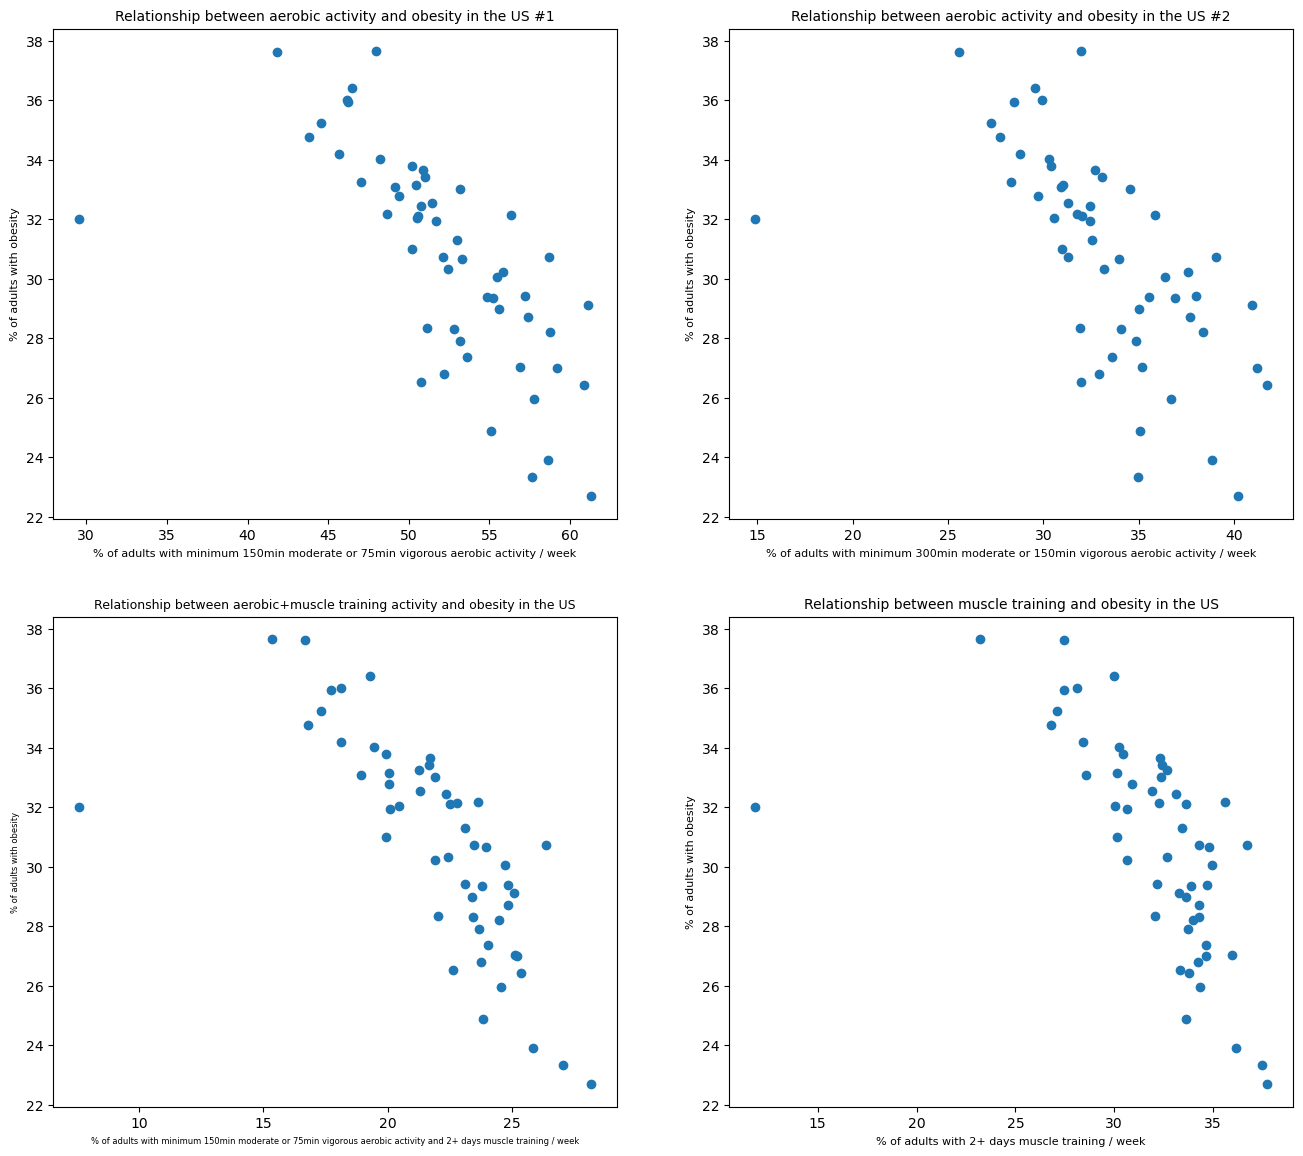

In [73]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(16, 14))  # Creates a new figure: 16 inches wide and 14 inches tall
gs = GridSpec(2, 2, figure=fig)   # Creates a 2x2 grid layout for subplots

ax1 = fig.add_subplot(gs[0, 0])  # Adds a subplot at the first row, first column of the grid
ax1.scatter(
    data=nutrition_total_avg,
    x='% with min 150min moderate or 75min vigorous aerobic activity per week',
    y='% with obesity'
)
ax1.set_xlabel('% of adults with minimum 150min moderate or 75min vigorous aerobic activity / week', size=8)
ax1.set_ylabel('% of adults with obesity', size=8)
ax1.set_title('Relationship between aerobic activity and obesity in the US #1', size=10)

ax2 = fig.add_subplot(gs[0, 1])  # Adds a subplot at the first row, second column of the grid
ax2.scatter(
    data=nutrition_total_avg,
    x='% with min 300min moderate or 150min vigorous aerobic activity per week',
    y='% with obesity'
)
ax2.set_xlabel('% of adults with minimum 300min moderate or 150min vigorous aerobic activity / week', size=8)
ax2.set_ylabel('% of adults with obesity', size=8)
ax2.set_title('Relationship between aerobic activity and obesity in the US #2', size=10)

ax3 = fig.add_subplot(gs[1, 0])  # Adds a subplot at the second row, first column of the grid
ax3.scatter(
    data=nutrition_total_avg,
    x='% with min 150min moderate or 75min vigorous aerobic activity and 2+ days muscle training per week',
    y='% with obesity'
)
ax3.set_xlabel('% of adults with minimum 150min moderate or 75min vigorous aerobic activity and 2+ days muscle training / week', size=6)
ax3.set_ylabel('% of adults with obesity', size=6)
ax3.set_title('Relationship between aerobic+muscle training activity and obesity in the US', size=9)

ax4 = fig.add_subplot(gs[1, 1])  # Adds a subplot at the second row, second column of the grid
ax4.scatter(
    data=nutrition_total_avg,
    x='% with 2+ days muscle training per week',
    y='% with obesity'
)
ax4.set_xlabel('% of adults with 2+ days muscle training / week', size=8)
ax4.set_ylabel('% of adults with obesity', size=8)
ax4.set_title('Relationship between muscle training and obesity in the US', size=10)

plt.show()

## Looking at the various scatterplots (and also by running the corr function in Python) analyze which explanatory variable has the strongest correlation with the % of respondents with obesity variable. Also look for outliers based on the scatterplot.

Looking at the scatterplots I've identified an outlier (state) where the percentage of adults engaging in various activities was much lower than in any other state (whereas the percentage of adults with obesity was similar to the percentage observed in many other states. Looking at the nutrition_total_avg table created at an earlier step above I've identified this outlier state to be Puerto Rico.

As a result, I have also removed Puerto Rico from the scope of this analysis:

In [74]:
''' First, remove it from the 'nutrition' dataframe '''
nutrition = nutrition[nutrition.index.get_level_values('State') != 'Puerto Rico']

In [75]:
''' Verify if the 'nutrition' dataframe now also excludes Puerto Rico (not just the Virgin Islands) '''
nutrition.index.get_level_values('State').unique()

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'National',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'Guam'],
      dtype='object', name='State')

In [76]:
# Repeat the cross section done before to make sure the 'nutrition_total' dataframe will also exclude Puerto Rico
nutrition_total = nutrition.xs('Total', level='Total')
nutrition_total.index.get_level_values('State').unique()

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'National',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'Guam'],
      dtype='object', name='State')

In [77]:
nutrition_total

Question                                                    % with overweight  \
Year State         Age(years) Education Gender Income Race                      
2011 Alabama       nan        nan       nan    nan    nan                34.7   
     Alaska        nan        nan       nan    nan    nan                38.9   
     Arizona       nan        nan       nan    nan    nan                37.8   
     Arkansas      nan        nan       nan    nan    nan                33.9   
     California    nan        nan       nan    nan    nan                36.4   
...                                                                       ...   
2023 Virginia      nan        nan       nan    nan    nan                34.3   
     Washington    nan        nan       nan    nan    nan                35.2   
     West Virginia nan        nan       nan    nan    nan                32.0   
     Wisconsin     nan        nan       nan    nan    nan                34.1   
     Wyoming       nan        nan       nan    nan    nan                35.7   

Question                                                    % with obesity  \
Year State         Age(years) Education Gender Income Race                   
2011 Alabama       nan        nan       nan    nan    nan             32.0   
     Alaska        nan        nan       nan    nan    nan             27.4   
     Arizona       nan        nan       nan    nan    nan             25.1   
     Arkansas      nan        nan       nan    nan    nan             30.9   
     California    nan        nan       nan    nan    nan             23.8   
...                                                                    ...   
2023 Virginia      nan        nan       nan    nan    nan             34.3   
     Washington    nan        nan       nan    nan    nan             30.6   
     West Virginia nan        nan       nan    nan    nan             41.2   
     Wisconsin     nan        nan       nan    nan    nan             35.9   
     Wyoming       nan        nan       nan    nan    nan             33.3   

Question                                                    % with min 150min moderate or 75min vigorous aerobic activity per week  \
Year State         Age(years) Education Gender Income Race                                                                           
2011 Alabama       nan        nan       nan    nan    nan                                                42.4                        
     Alaska        nan        nan       nan    nan    nan                                                57.9                        
     Arizona       nan        nan       nan    nan    nan                                                52.8                        
     Arkansas      nan        nan       nan    nan    nan                                                45.7                        
     California    nan        nan       nan    nan    nan                                                58.2                        
...                                                                                                       ...                        
2023 Virginia      nan        nan       nan    nan    nan                                                63.5                        
     Washington    nan        nan       nan    nan    nan                                                66.5                        
     West Virginia nan        nan       nan    nan    nan                                                53.1                        
     Wisconsin     nan        nan       nan    nan    nan                                                58.0                        
     Wyoming       nan        nan       nan    nan    nan                                                60.9                        

Question                                                    % with min 150min moderate or 75min vigorous aerobic activity and 2+ days muscle training per week  \
Year State         Age(yea

The nutrition_total dataframe now excludes puerto Rico and therefore its number of rows also decreased from 697 rows to 686 rows.

Repeat the code done earlier to group the nutrition_total dataframe by state and calculate average values by state, thus updating the resulting nutrition_total_avg dataframe, excluding Puerto Rico

In [78]:
nutrition_total_avg = nutrition_total.groupby('State')[columns_to_average].mean()
nutrition_total_avg

Question,% with overweight,% with obesity,% with min 150min moderate or 75min vigorous aerobic activity per week,% with min 150min moderate or 75min vigorous aerobic activity and 2+ days muscle training per week,% with min 300min moderate or 150min vigorous aerobic activity per week,% with 2+ days muscle training per week,% with no physical activity,% eating fruits less than once per day,% eating vegetables less than once per day
State,,,,,,,,,
Alabama,33.769231,35.938462,46.233333,17.716667,28.433333,27.483333,30.223077,45.633333,20.733333
Alaska,35.823077,30.715385,58.683333,26.350000,39.050000,36.716667,20.692308,40.700000,18.900000
Arizona,35.369231,29.376923,54.833333,24.816667,35.550000,34.716667,23.230769,39.100000,21.466667
Arkansas,33.500000,36.007692,46.166667,18.116667,29.933333,28.116667,31.753846,45.866667,20.666667
California,35.776923,25.969231,57.750000,24.550000,36.716667,34.333333,20.876923,34.966667,22.600000
Colorado,35.569231,22.684615,61.300000,28.166667,40.200000,37.750000,17.207692,36.100000,18.566667
Connecticut,36.038462,27.361538,53.600000,24.033333,33.616667,34.666667,23.069231,33.866667,19.100000
Delaware,35.453846,32.430769,50.750000,22.350000,32.433333,33.133333,26.538462,37.366667,19.333333
District of Columbia,31.423077,23.323077,57.650000,27.033333,34.966667,37.466667,18.376923,33.133333,15.733333


Repeat the plotting done earlier with the outlier (Puerto Rico) removed:

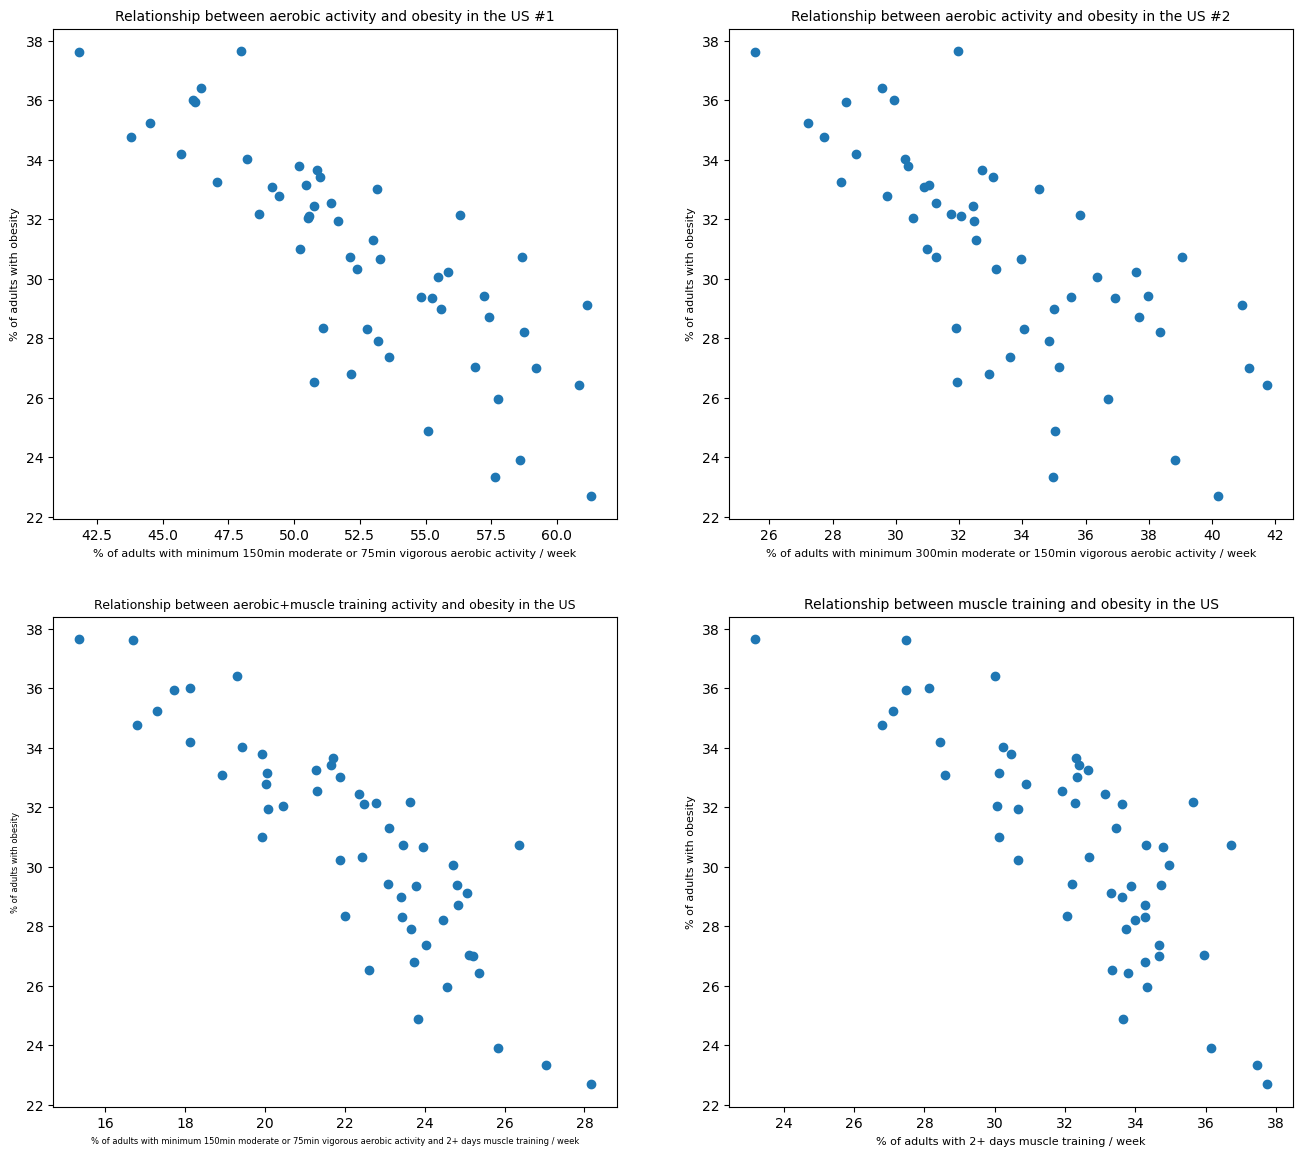

In [79]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(16, 14))  # Creates a new figure: 16 inches wide and 14 inches tall
gs = GridSpec(2, 2, figure=fig)   # Creates a 2x2 grid layout for subplots

ax1 = fig.add_subplot(gs[0, 0])  # Adds a subplot at the first row, first column of the grid
ax1.scatter(
    data=nutrition_total_avg,
    x='% with min 150min moderate or 75min vigorous aerobic activity per week',
    y='% with obesity'
)
ax1.set_xlabel('% of adults with minimum 150min moderate or 75min vigorous aerobic activity / week', size=8)
ax1.set_ylabel('% of adults with obesity', size=8)
ax1.set_title('Relationship between aerobic activity and obesity in the US #1', size=10)

ax2 = fig.add_subplot(gs[0, 1])  # Adds a subplot at the first row, second column of the grid
ax2.scatter(
    data=nutrition_total_avg,
    x='% with min 300min moderate or 150min vigorous aerobic activity per week',
    y='% with obesity'
)
ax2.set_xlabel('% of adults with minimum 300min moderate or 150min vigorous aerobic activity / week', size=8)
ax2.set_ylabel('% of adults with obesity', size=8)
ax2.set_title('Relationship between aerobic activity and obesity in the US #2', size=10)

ax3 = fig.add_subplot(gs[1, 0])  # Adds a subplot at the second row, first column of the grid
ax3.scatter(
    data=nutrition_total_avg,
    x='% with min 150min moderate or 75min vigorous aerobic activity and 2+ days muscle training per week',
    y='% with obesity'
)
ax3.set_xlabel('% of adults with minimum 150min moderate or 75min vigorous aerobic activity and 2+ days muscle training / week', size=6)
ax3.set_ylabel('% of adults with obesity', size=6)
ax3.set_title('Relationship between aerobic+muscle training activity and obesity in the US', size=9)

ax4 = fig.add_subplot(gs[1, 1])  # Adds a subplot at the second row, second column of the grid
ax4.scatter(
    data=nutrition_total_avg,
    x='% with 2+ days muscle training per week',
    y='% with obesity'
)
ax4.set_xlabel('% of adults with 2+ days muscle training / week', size=8)
ax4.set_ylabel('% of adults with obesity', size=8)
ax4.set_title('Relationship between muscle training and obesity in the US', size=10)

plt.show()

By purely looking at the scatterplots, there seems to be a clear negative relationship between the examined 4 types of physical activity and obesity levels.

The charts show a clear trend that in case of the states where a higher percentage of the population engages in physical exercises (aerobic, weight-training, lower intensity, higher intensity) the obesity rates (percentage of population with obesity) tends to be lower.

Interestingly, looking at the charts I have the impression that muscle training activity may not be less effective against obesity than aerobic activity. Those states where 36-38% of the population does muscle training at least twice a week (but doesn't do aerobic exercises) has an obesity rate of 22-31%.

In comparison, in order to achieve the same obesity rate of 22-31%, at least 50% of the people had to do a minimum of 150 minutes of moderate or 75 minutes of vigorous aerobic activity per week.

In order to be able to reach more accurate conclusions, I have also run a correlation analysis on this dataframe:

In [80]:
nutrition_total_avg.corr()

Question,% with overweight,% with obesity,% with min 150min moderate or 75min vigorous aerobic activity per week,% with min 150min moderate or 75min vigorous aerobic activity and 2+ days muscle training per week,% with min 300min moderate or 150min vigorous aerobic activity per week,% with 2+ days muscle training per week,% with no physical activity,% eating fruits less than once per day,% eating vegetables less than once per day
Question,,,,,,,,,
% with overweight,1.000000,-0.362276,0.356641,0.348367,0.342472,0.330854,-0.344425,-0.420536,-0.068734
% with obesity,-0.362276,1.000000,-0.805556,-0.867315,-0.724154,-0.807133,0.804378,0.791286,0.294446
% with min 150min moderate or 75min vigorous aerobic activity per week,0.356641,-0.805556,1.000000,0.885521,0.962408,0.754189,-0.938925,-0.736027,-0.445667
% with min 150min moderate or 75min vigorous aerobic activity and 2+ days muscle training per week,0.348367,-0.867315,0.885521,1.000000,0.818499,0.966094,-0.847466,-0.701590,-0.193632
% with min 300min moderate or 150min vigorous aerobic activity per week,0.342472,-0.724154,0.962408,0.818499,1.000000,0.667377,-0.824969,-0.612934,-0.459946
% with 2+ days muscle training per week,0.330854,-0.807133,0.754189,0.966094,0.667377,1.000000,-0.750973,-0.620925,-0.025579
% with no physical activity,-0.344425,0.804378,-0.938925,-0.847466,-0.824969,-0.750973,1.000000,0.792661,0.449727
% eating fruits less than once per day,-0.420536,0.791286,-0.736027,-0.701590,-0.612934,-0.620925,0.792661,1.000000,0.498550
% eating vegetables less than once per day,-0.068734,0.294446,-0.445667,-0.193632,-0.459946,-0.025579,0.449727,0.498550,1.000000


Based on this the explanatory variable which has the strongest negative correlation with obesity is the combined activity when people do at least 150 minutes of moderate or 75 minutes of vigorous aerobic activity per week combined with at least 2 days a week of weight training (muscle training) activities. This has a correlation of -0.867315, i.e. relatively close to -1, which clearly signals that those states where a higher percentage of the population follows this exercising routine has lower obesity rates.

Each of the plotted 4 types of exercise regimes has a fairly strong negative correlation with obesity rates (<-0.7), which shows high levels of efficiency.

My visual obserbation from the scatterplots (that muscle training activity may not be less effective against obesity than aerobic activity) was confirmed by the correlation analisis: the correlation coefficient of both kind of activities (at least 150 minutes of moderate or 75 minutes of vigorous aerobic activity per week  and  at least 2 days of muscle/weight training activity per week) was between -0.80 and -0.81.

In addition, the correlation analysis led to 2 other insightful takeaways:
* Increasing the duration or intensity of aerobic activity above a certain level seems to become counter-effective against combating weight gain. The correlation coefficient between at least 300 minutes of moderate or 150 minutes of vigorous aerobic activity per week and obesity rates was less negative (-0.724154) than the correlation coefficient between at least 150 minutes of moderate or 75 minutes of vigorous aerobic activity per week and obesity rates (-0.805556).
* Instead, people should rather focus on keeping the same intensity and duration of aerobic activities and combine it with weight/muscle training activities.

## Also calculate the p value for each explanatory variable to ascertain in case of which type of activity can we reject the null hypothesis (if any) that those kind of activities have no effect on obesity.

Although the above analysis clearly showed a strong relationship between these activities and obesity rates, I have also performed hypothesis testing calculating the p value.

For the testing I have used the commonly applied alpha significance level of 0.05 to compare it with the p value to reject the null hypothesis that these kind of activities have no effect on obesity (in case the p value falls below 0.05) or fail to reject the null hypothesis (in case the p value in higher than 0.05).

In [81]:
# Calculating Pearson p-value
correlation, p_value = pearsonr(nutrition_total_avg['% with min 150min moderate or 75min vigorous aerobic activity per week'], nutrition_total_avg['% with obesity'])

p_value

3.494860941798208e-13

In [82]:
# Calculating Pearson p-value
correlation, p_value = pearsonr(nutrition_total_avg['% with min 300min moderate or 150min vigorous aerobic activity per week'], nutrition_total_avg['% with obesity'])

p_value

8.88683218970015e-10

In [83]:
# Calculating Pearson p-value
correlation, p_value = pearsonr(nutrition_total_avg['% with min 150min moderate or 75min vigorous aerobic activity and 2+ days muscle training per week'], nutrition_total_avg['% with obesity'])

p_value

4.500131598480356e-17

In [84]:
# Calculating Pearson p-value
correlation, p_value = pearsonr(nutrition_total_avg['% with 2+ days muscle training per week'], nutrition_total_avg['% with obesity'])

p_value

2.8983077256214054e-13

Unsurprisingly, p values were much below the alpha significance level of 0.05 in each case, thus rejecting the null hypothesis that these kind of activities have no effect on obesity.

Certainly, obesity rates are also impacted by other factors (diet, genetics, etc), but this analysis undeniably showed that both aerobic and weight/muscle training activities are highly effective against obesity and overtraining in aerobic activitiers on the other hand tend to reduce their effectiveness.

## Heatmap

I've also plotted the variables on a heatmap, showing the states in the various rows (y axis) and the measures in the columns (x axis). As this visual has many measure/state combinations (datapoints), heatmap is an efficient way of easily spotting highest and lowest values:

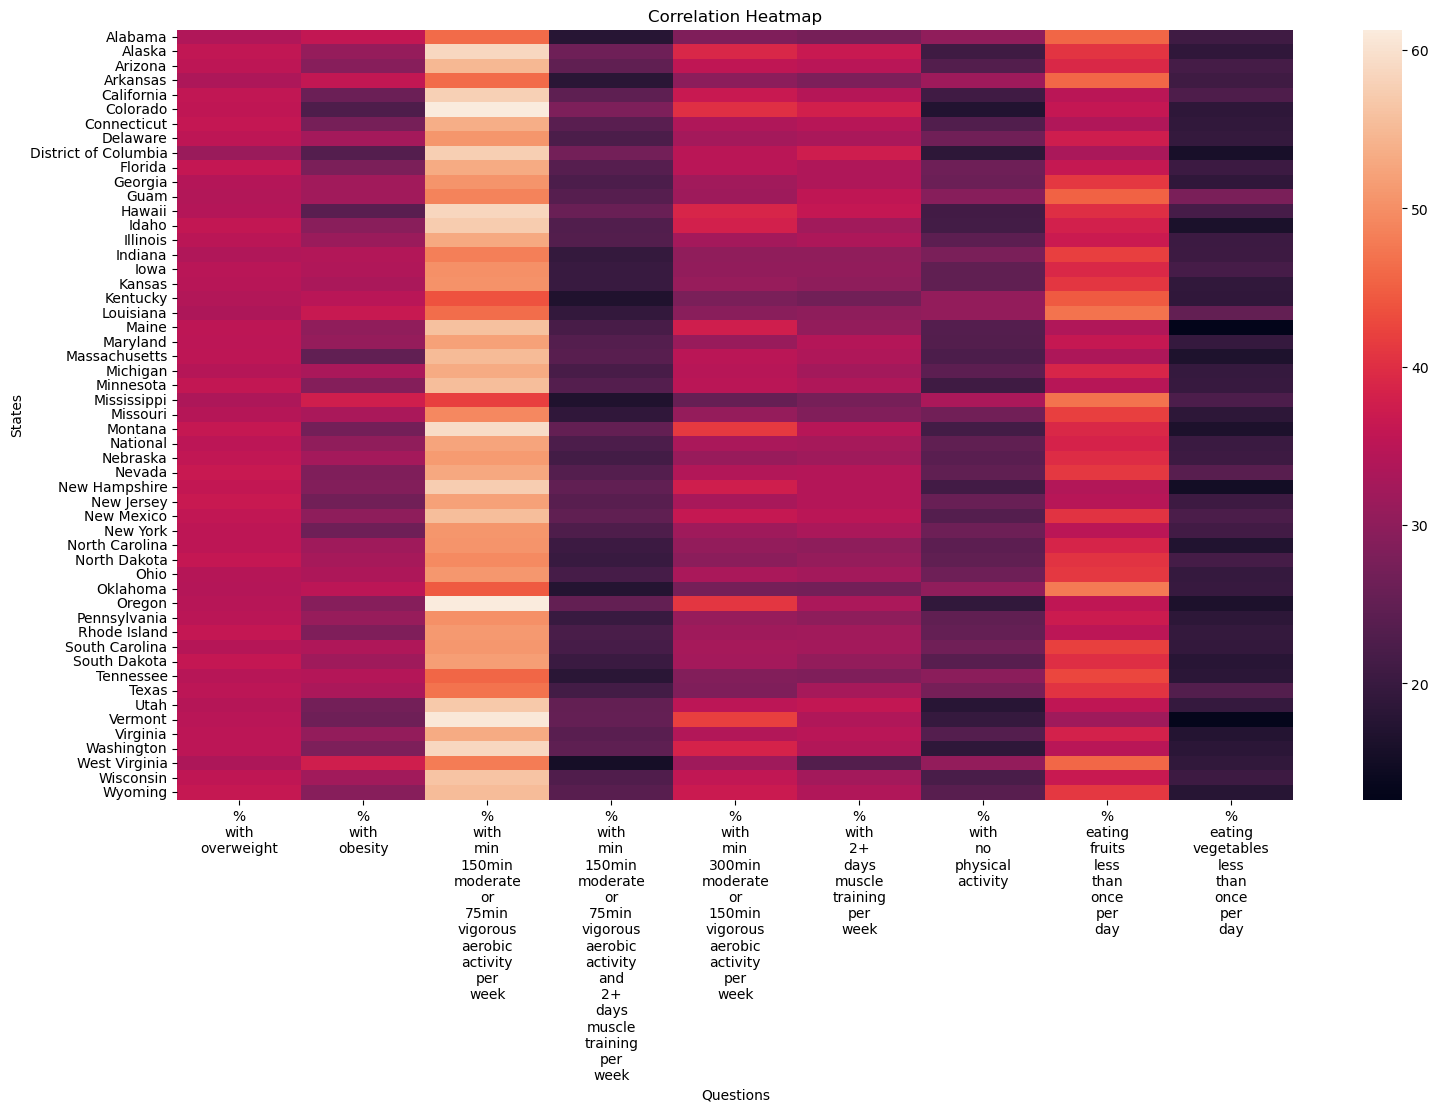

In [85]:
plt.figure(figsize=(18, 10))

new_labels = ['\n'.join(label.split()) for label in nutrition_total_avg.columns]

sns.heatmap(data=nutrition_total_avg, xticklabels=new_labels, yticklabels=nutrition_total_avg.index)

plt.title("Correlation Heatmap")
plt.xlabel("Questions")
plt.ylabel("States")

plt.show()


The heatmap clearly showed that states like Colorado, Montana, Vermont were among the lowest in obesity rates and the highest on the % of population engaging in various types of physical exercises.

On the other hand, states like Arkansas, Luisiana, Mississip and West Virginia were among the states with the highest obesity rates and the lowest percentage of the population engaging in various types of physical exercises.

## Summary

As already explained above, my preliminary assumption was that both aerobic and weight training activities are effective approaches to combat obesity and when it comes to comparing the effect of the two activity categories, my initial assumption was that aerobic activity is more effective against obesity than weight training activity.

During my analysis I've tested this assumption through visual techiques (scatterplots, heatmaps) and I've also performed correlation analysis and I've also calculated the p value in order to reject or fail to reject the null hypothesis that various kinds, intensity, length and frequency of aerobic and weight training activities have no effect on obesity.

Here are my key takeaways from the analysis:
* Aerobic and muscle/weight training activities are effective against obesity in any form, frequency, intensity and combination.
* The explanatory variable which has the strongest negative correlation with obesity (i.e. the most effective to combat obesity) is the combined activity when people do at least 150 minutes of moderate or 75 minutes of vigorous aerobic activity per week combined with at least 2 days a week of weight training (muscle training) activities. This has a correlation of -0.867315, i.e. relatively close to -1. This clearly signals that those states where a higher percentage of the population follows this exercising routine has lower obesity rates.
* Increasing the duration or intensity of aerobic activity above a certain level seems to become counter-effective against combating weight gain. The correlation coefficient between at least 300 minutes of moderate or 150 minutes of vigorous aerobic activity per week and obesity rates was less negative (-0.724154) than the correlation coefficient between at least 150 minutes of moderate or 75 minutes of vigorous aerobic activity per week and obesity rates (-0.805556).
* Instead, people should rather focus on keeping the same intensity and duration of aerobic activities and combine it with weight/muscle training activities.